Load the dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('customer_shopping_data.csv')
df.head(3)
df.shape

(99457, 10)

In [4]:
df.describe(include='all')

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
count,99457,99457,99457,99457.000000,99453,99457.000000,99453.000000,99457,99457,99457
unique,99457,99457,2,NaN,8,NaN,NaN,3,797,10
top,I232867,C273973,Female,NaN,Clothing,NaN,NaN,Cash,24/11/2021,Mall of Istanbul
freq,1,1,59482,NaN,34486,NaN,NaN,44447,159,19943
mean,NaN,NaN,NaN,43.427089,NaN,3.003429,689.276466,NaN,NaN,NaN
std,NaN,NaN,NaN,14.990054,NaN,1.413025,941.196886,NaN,NaN,NaN
min,NaN,NaN,NaN,18.000000,NaN,1.000000,5.230000,NaN,NaN,NaN
25%,NaN,NaN,NaN,30.000000,NaN,2.000000,45.450000,NaN,NaN,NaN
50%,NaN,NaN,NaN,43.000000,NaN,3.000000,203.300000,NaN,NaN,NaN
75%,NaN,NaN,NaN,56.000000,NaN,4.000000,1200.320000,NaN,NaN,NaN


In [11]:
df.isnull().sum()
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,datetime,month,day
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/22,Kanyon,2022-05-08,May,Sunday
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/21,Forum Istanbul,2021-12-12,December,Sunday
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/21,Metrocity,2021-09-11,September,Saturday
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,2021-05-16,May,Sunday
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,2021-10-24,October,Sunday


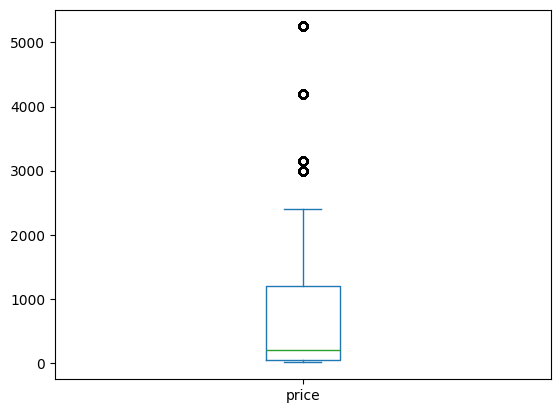

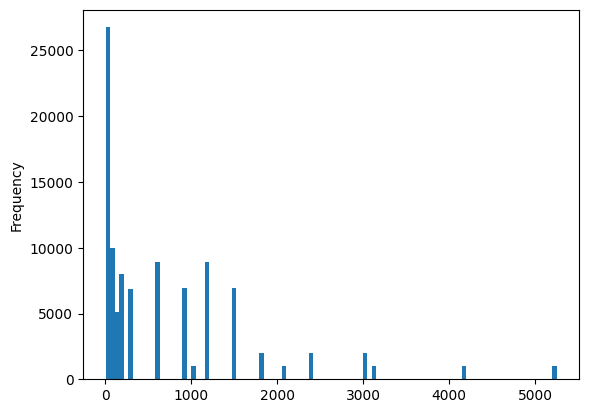

In [6]:
df['price'].plot(kind='box')
plt.show()

df['price'].plot(kind='hist', bins=100)
plt.show()

In [7]:
df[df.duplicated(subset=['invoice_no'], keep=False)]
df['invoice_no'].nunique()

99457

In [18]:
df['datetime'] = pd.to_datetime(df['invoice_date'])
df['month'] = df['datetime'].dt.month_name()
df['day'] = df['datetime'].dt.day_name()
df
df.dtypes

/tmp/ipykernel_1669/1109420812.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['invoice_date'])


invoice_no                object
customer_id               object
gender                    object
age                        int64
category                  object
quantity                   int64
price                    float64
payment_method            object
invoice_date              object
shopping_mall             object
datetime          datetime64[ns]
month                     object
day                       object
dtype: object

In [16]:
from datetime import date

holidays = {
    'New Year': (date(2025, 1, 1), date(2025, 1, 1)),  # New Year Day
    'National Sovereignty and Children\'s Day': (date(2025, 4, 23), date(2025, 4, 23)),  # April 23
    'Labour and Solidarity Day': (date(2025, 5, 1), date(2025, 5, 1)),  # May 1
    'Commemoration of Atatürk, Youth and Sports Day': (date(2025, 5, 19), date(2025, 5, 19)),  # May 19
    'Democracy and National Unity Day': (date(2025, 7, 15), date(2025, 7, 15)),  # July 15
    'Victory Day': (date(2025, 8, 30), date(2025, 8, 30)),  # August 30
    'Republic Day': (date(2025, 10, 29), date(2025, 10, 29)),  # October 29
    'Ramadan Feast': (date(2025, 3, 30), date(2025, 4, 1)),  # Example dates for Ramadan Feast
    'Sacrifice Feast': (date(2025, 7, 28), date(2025, 7, 31))  # Example dates for Sacrifice Feast
}
holidays

{'New Year': (datetime.date(2025, 1, 1), datetime.date(2025, 1, 1)),
 "National Sovereignty and Children's Day": (datetime.date(2025, 4, 23),
  datetime.date(2025, 4, 23)),
 'Labour and Solidarity Day': (datetime.date(2025, 5, 1),
  datetime.date(2025, 5, 1)),
 'Commemoration of Atatürk, Youth and Sports Day': (datetime.date(2025, 5, 19),
  datetime.date(2025, 5, 19)),
 'Democracy and National Unity Day': (datetime.date(2025, 7, 15),
  datetime.date(2025, 7, 15)),
 'Victory Day': (datetime.date(2025, 8, 30), datetime.date(2025, 8, 30)),
 'Republic Day': (datetime.date(2025, 10, 29), datetime.date(2025, 10, 29)),
 'Ramadan Feast': (datetime.date(2025, 3, 30), datetime.date(2025, 4, 1)),
 'Sacrifice Feast': (datetime.date(2025, 7, 28), datetime.date(2025, 7, 31))}

In [ ]:
def get_holiday_name(my_date, holidays):
    """
    This function checks whether the supplied date falls within 
    any of the date ranges specified in the holidays dictionary
    """
    return_value = 'not_a_holiday' # default value
    for key in holidays.keys():
        date_range = holidays[key]
        from_date = date_range[0]
        to_date = date_range[1]
        if from_date <= my_date <= to_date:
            return_value = key
            break

    return return_value

In [46]:
# Test a date that's not a holiday
test_date = date(2025, 2, 2)
formatted_date = test_date.strftime('%A, %d %B %y')
holiday_name = get_holiday_name(test_date, holidays)

print(f'{formatted_date} : {holiday_name}')

# Test a date that is a single-day holiday
test_date = date(2025, 1, 1)
formatted_date = test_date.strftime('%A, %d %B %y')
holiday_name = get_holiday_name(test_date, holidays)

print(f'{formatted_date} : {holiday_name}')

# # Test a date that falls within a multi-day holiday period

test_date = date(2025, 3, 31)
formatted_date = test_date.strftime('%A, %d %B %y')
holiday_name = get_holiday_name(test_date, holidays)

print(f'{formatted_date} : {holiday_name}')

Sunday, 02 February 25 : not_a_holiday
Wednesday, 01 January 25 : New Year
Monday, 31 March 25 : Ramadan Feast


Create a new column indicating the holiday period, if any

In [48]:
df.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall', 'datetime',
       'month', 'day'],
      dtype='object')

In [49]:
df['holiday_name'] = df['datetime'].apply(get_holiday_name, args=(holidays,))
df.head(3)

TypeError: Cannot compare Timestamp with datetime.date. Use ts == pd.Timestamp(date) or ts.date() == date instead.